<a href="https://colab.research.google.com/github/isa-dgc/ML/blob/main/Exemplo_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv("/content/housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
data.dropna(inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data = data.drop(columns=['longitude','latitude','ocean_proximity'])
data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


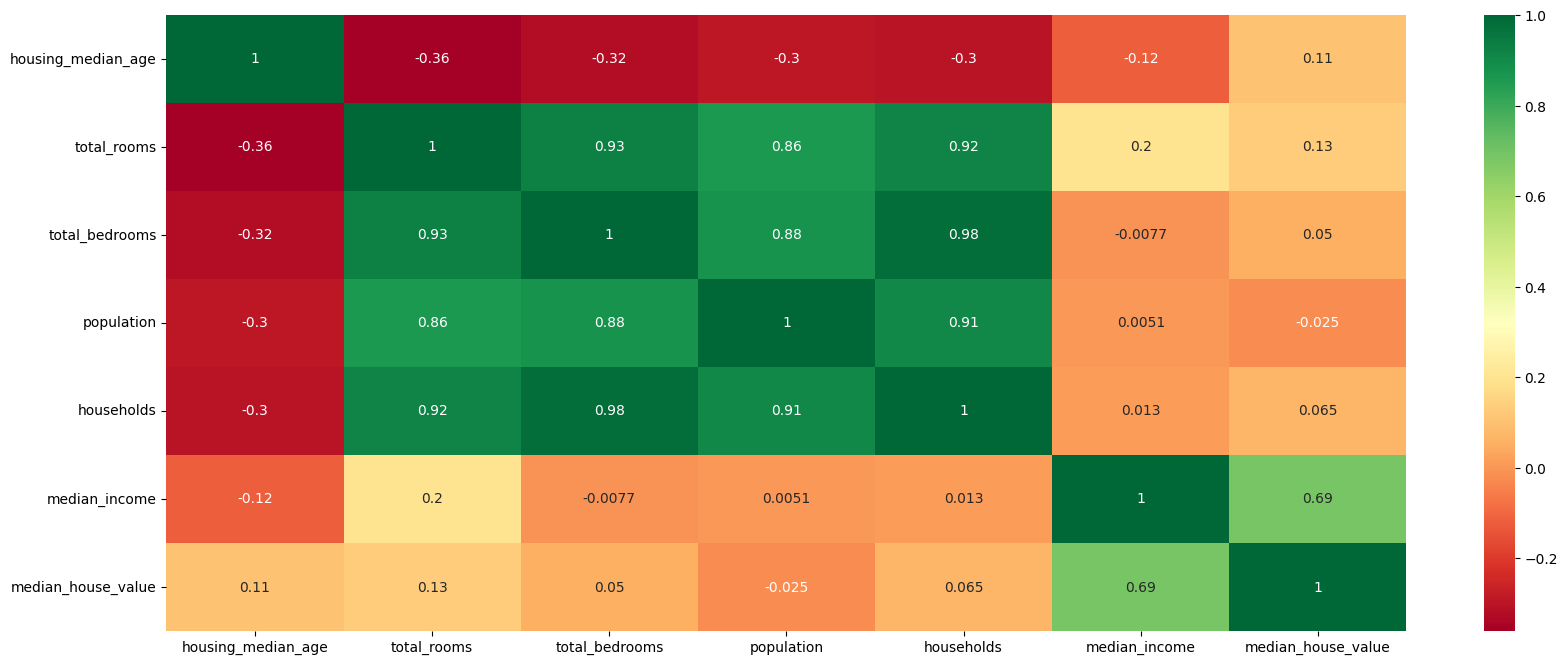

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), annot = True, cmap= "RdYlGn");
# data.corr()

In [ ]:
X = data[['median_income']].values
y = data['median_house_value'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =42)

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred= regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ",mse)
print("Coeficiente de Determinação: ", r2)

MSE:  6982859996.244634
Coeficiente de Determinação:  0.4761911795039645


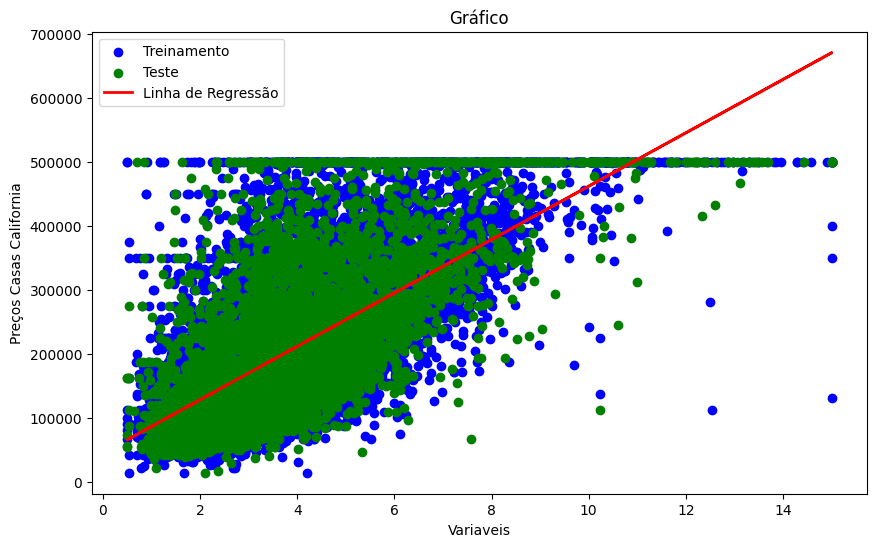

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(X_train[:,0], y_train, color='blue', label = "Treinamento")
plt.scatter(X_test[:,0], y_test, color='green', label = "Teste")
plt.plot(X_test, y_pred, color='red', linewidth=2, label = "Linha de Regressão")

plt.xlabel("Variaveis")
plt.ylabel("Preços Casas California")
plt.title("Gráfico")
plt.legend()
plt.show()

In [ ]:
new_X = [[5.931], [1.598], [13.895]]
predictions = regressor.predict(new_X)

In [ ]:
for x, prediction in zip(new_X, predictions):
    print(f"Para o income de pessoas de {x}, a previsão é de preço da casa é R${prediction:.2f}")
    print(" ")

Para o income de pessoas de [5.931], a previsão é de preço da casa é R$292861.85
 
Para o income de pessoas de [1.598], a previsão é de preço da casa é R$112217.62
 
Para o income de pessoas de [13.895], a previsão é de preço da casa é R$624883.69
 


In [ ]:
# Nao boa correlação

In [ ]:
X = data[['population']].values
y = data['median_house_value'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =42)

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred= regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ",mse)
print("Coeficiente de Determinação: ", r2)

MSE:  13323909893.378742
Coeficiente de Determinação:  0.0005267856724086029


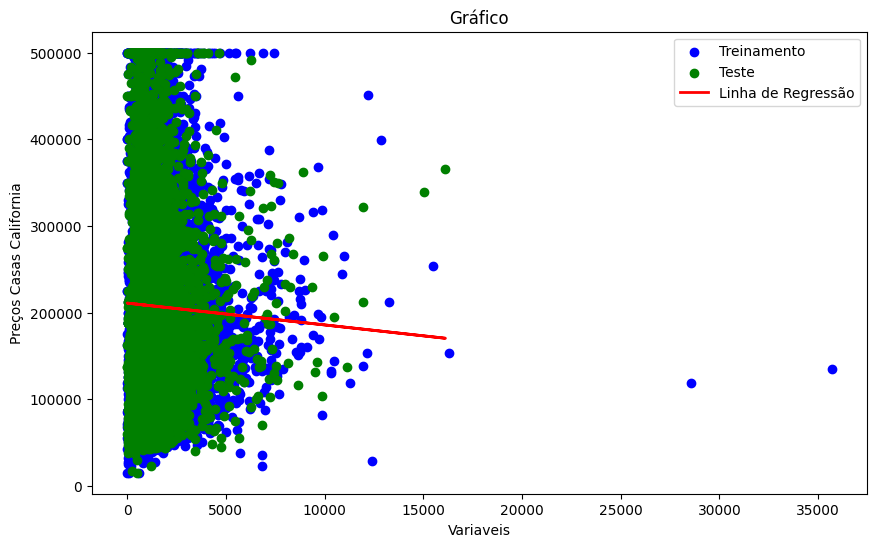

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(X_train[:,0], y_train, color='blue', label = "Treinamento")
plt.scatter(X_test[:,0], y_test, color='green', label = "Teste")
plt.plot(X_test, y_pred, color='red', linewidth=2, label = "Linha de Regressão")

plt.xlabel("Variaveis")
plt.ylabel("Preços Casas California")
plt.title("Gráfico")
plt.legend()
plt.show()

In [ ]:
new_X = [[1000], [20000], [35000]]
predictions = regressor.predict(new_X)

In [ ]:
for x, prediction in zip(new_X, predictions):
    print(f"Para a população {x}, a previsão é de preço da casa é R${prediction:.2f}")
    print(" ")

Para a população [1000], a previsão é de preço da casa é R$208350.82
 
Para a população [20000], a previsão é de preço da casa é R$160488.42
 
Para a população [35000], a previsão é de preço da casa é R$122702.32
 
